In [54]:
## Random Forest alogirthm to predict binary failure and also multi class failure type

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


machine = pd.read_csv(r"C:\Users\CalumBrown\OneDrive - Blend 360\Documents\Personal Development\Machine Learning Interview\Cleaned Machine Failure Dataset.csv", index_col=0)

In [55]:
# Seperating into dependant and independant variables 

x = machine[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = machine['Failure Type']
y2 = machine['Failure']

In [56]:
## Random Forest classifier on failure type

## Seperating into training splits with validation set so can fine tune parameters and fit on validation set so only exposed to test once final model made
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain,test_size=0.2, random_state=42)

In [57]:
# Encoding our target variable
# Should do this after split to avoid data leakage
Label_Encoder = LabelEncoder()
ytrain = Label_Encoder.fit_transform(ytrain)
yval = Label_Encoder.fit_transform(yval)
ytest = Label_Encoder.fit_transform(ytest)

In [58]:
# Possible additional step is to scale our x numeric features using scalar function 
# Not completely necessary for this model type but can try after
# again done after split to avoid data leakage

In [59]:
# Fitting random forest model with no paramter tuning

rf1 = RandomForestClassifier(random_state=42)
rf1.fit(xtrain, ytrain)
rf1_predict = rf1.predict(xval)

print(accuracy_score(yval, rf1_predict))
print(confusion_matrix(yval, rf1_predict))
print(classification_report(yval, rf1_predict))

## Performance diminishes in rarer cases of failure


0.9748299319727891
[[  13    6    0    1    0    0]
 [   1 1412    1    0    0    0]
 [   0    9    3    0    0    0]
 [   0    6    0    5    0    0]
 [   0    4    0    0    0    0]
 [   0    8    1    0    0    0]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.98      1.00      0.99      1414
           2       0.60      0.25      0.35        12
           3       0.83      0.45      0.59        11
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.97      1470
   macro avg       0.56      0.39      0.45      1470
weighted avg       0.96      0.97      0.97      1470



c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Fine tuning using randomizedsearchcv to determine best parameters
# Using cv does its own cross validation so dont really need validation set 

param_grid = {
    'n_estimators': [10, 100, 200, 300],  
    'max_depth': [3, 5, 10, 20, None],       
    'max_features':["sqrt", "log2", None],    
    'min_samples_leaf': [1, 2, 4],              
    'bootstrap': [True, False]  
}

rf2 = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(rf2, param_grid, cv=10,n_iter=100, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

best_rf = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

rf2_predict = best_rf.predict(xval)

test_accuracy = accuracy_score(yval, rf2_predict)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(yval, rf2_predict))

print("\nConfusion Matrix:\n", confusion_matrix(yval, rf2_predict))

## better performance but still poor on rarer classes of failure 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters:  {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best score:  0.9795918367346939
Test Accuracy: 0.9762

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.98      1.00      0.99      1414
           2       0.50      0.33      0.40        12
           3       0.62      0.45      0.53        11
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.98      1470
   macro avg       0.51      0.44      0.47      1470
weighted avg       0.97      0.98      0.97      1470


Confusion Matrix:
 [[  17    2    0    1    0    0]
 [   1 1409    2    2    0    0]
 [   0    8    4    0    0    0]
 [   0    5    1    5    0    0]
 [   0    4    0    0    0    0]
 [   0 

c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
# Fitting on test set now 
rf2_test = best_rf.predict(xtest)

test_accuracy = accuracy_score(ytest, rf2_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(ytest, rf2_test))

print("\nConfusion Matrix:\n", confusion_matrix(ytest, rf2_test))

Test Accuracy: 0.9837

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.99      1.00      0.99      2370
           2       0.69      0.47      0.56        19
           3       0.74      0.83      0.78        24
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.98      2451
   macro avg       0.56      0.51      0.53      2451
weighted avg       0.98      0.98      0.98      2451


Confusion Matrix:
 [[  20    4    0    3    0    0]
 [   1 2362    4    3    0    0]
 [   0    9    9    1    0    0]
 [   1    3    0   20    0    0]
 [   0    3    0    0    0    0]
 [   0    8    0    0    0    0]]


c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\CalumBrown\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


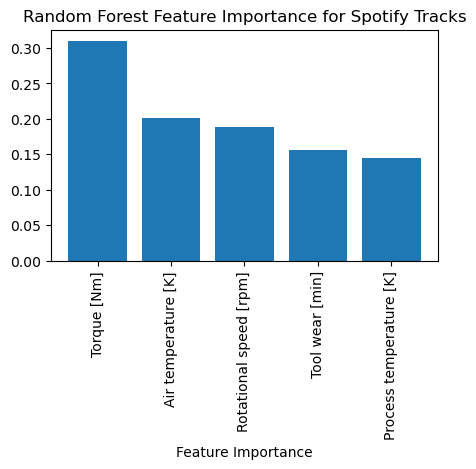

In [62]:
feature_importances = best_rf.feature_importances_
feature_names = x.columns

# Sort and plot
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(5, 3))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance for Spotify Tracks")
plt.show()

In [63]:
## Now testing failure or not binary outcome

xtrain, xtest, ytrain, ytest = train_test_split(x,y2,test_size=0.25, random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain,test_size=0.2, random_state=42)

In [64]:
param_grid = {
    'n_estimators': [10, 100, 200, 300],  
    'max_depth': [3, 5, 10, 20, None],       
    'max_features':["sqrt", "log2", None],    
    'min_samples_leaf': [1, 2, 4],              
    'bootstrap': [True, False]  
}

rffail1 = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(rffail1, param_grid, cv=10, n_iter=100, scoring='f1_macro', n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

best_rffail = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

rffail1_test = best_rffail.predict(xval)

test_accuracy = accuracy_score(yval, rffail1_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(yval, rffail1_test))

print("\nConfusion Matrix:\n", confusion_matrix(yval, rffail1_test))

## Pretty Good Performance when using accuracy as scoring metric
## Even better with f1
## false negatives could be expensive - should look to minimise this even if at cost of more false positives

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters:  {'n_estimators': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best score:  0.8160856750493097
Test Accuracy: 0.9755

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1414
           1       0.75      0.54      0.62        56

    accuracy                           0.98      1470
   macro avg       0.87      0.76      0.81      1470
weighted avg       0.97      0.98      0.97      1470


Confusion Matrix:
 [[1404   10]
 [  26   30]]


In [65]:
# Trying to maximise recall as evaluation metric to avoid false negatives


rffail1 = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(rffail1, param_grid, cv=10, n_iter=100, scoring='recall_macro', n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

best_rffail = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

rffail1_test = best_rffail.predict(xval)

test_accuracy = accuracy_score(yval, rffail1_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(yval, rffail1_test))

print("\nConfusion Matrix:\n", confusion_matrix(yval, rffail1_test))

# Lost overall accuracy and no improvement in false negatives
# Will try changing threshold for classification 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters:  {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best score:  0.783285298209007
Test Accuracy: 0.9769

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1414
           1       0.81      0.52      0.63        56

    accuracy                           0.98      1470
   macro avg       0.89      0.76      0.81      1470
weighted avg       0.97      0.98      0.97      1470


Confusion Matrix:
 [[1407    7]
 [  27   29]]


In [66]:
# Trying lower cut off threshold to see if can avoid false negatives
# 0.4 cut off made false negatives and false positives even 
# 0.3 decreases but results in only 22 false negatives - much same as 0.4 but lose accuracy 

rffail1 = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(rffail1, param_grid, cv=10, n_iter=100, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(xtrain, ytrain)

best_rffail = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict probabilities instead of classes
probs = best_rffail.predict_proba(xval)[:, 1]  # probability of class 1

# Set a lower threshold, e.g., 0.3 or 0.4 instead of 0.5
threshold = 0.4
rffail1_test = (probs >= threshold).astype(int)

# Evaluate
test_accuracy = accuracy_score(yval, rffail1_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(yval, rffail1_test))
print("\nConfusion Matrix:\n", confusion_matrix(yval, rffail1_test))


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters:  {'n_estimators': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'bootstrap': True}
Best score:  0.9785714285714286
Test Accuracy: 0.9762

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1414
           1       0.71      0.62      0.67        56

    accuracy                           0.98      1470
   macro avg       0.85      0.81      0.83      1470
weighted avg       0.97      0.98      0.98      1470


Confusion Matrix:
 [[1400   14]
 [  21   35]]


In [67]:
# Testing on test set now for final performance using 0.4 as threshold and keeping accuracy as evaluation metric

# Predict probabilities instead of classes
probs = best_rffail.predict_proba(xtest)[:, 1]  # probability of class 1

# Set a lower threshold, e.g., 0.3 or 0.4 instead of 0.5
threshold = 0.4
rffail1_test = (probs >= threshold).astype(int)

# Evaluate
test_accuracy = accuracy_score(ytest, rffail1_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(ytest, rffail1_test))
print("\nConfusion Matrix:\n", confusion_matrix(ytest, rffail1_test))


Test Accuracy: 0.9808

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2370
           1       0.71      0.72      0.71        81

    accuracy                           0.98      2451
   macro avg       0.85      0.85      0.85      2451
weighted avg       0.98      0.98      0.98      2451


Confusion Matrix:
 [[2346   24]
 [  23   58]]


In [ ]:
## Without validation split

x2train, x2test, y2train, y2test = train_test_split(x,y2,test_size = 0.3, random_state=42)


In [ ]:
rffail1 = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(rffail1, param_grid, cv=10, n_iter=100, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x2train, y2train)

best_rffail = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict probabilities instead of classes
probs = best_rffail.predict_proba(x2test)[:, 1]  # probability of class 1

# Set a lower threshold, e.g., 0.3 or 0.4 instead of 0.5
threshold = 0.4
rffail1_test = (probs >= threshold).astype(int)

# Evaluate
test_accuracy = accuracy_score(y2test, rffail1_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y2test, rffail1_test))
print("\nConfusion Matrix:\n", confusion_matrix(y2test, rffail1_test))



Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters:  {'n_estimators': 300, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'bootstrap': True}
Best score:  0.9794460641399416
Test Accuracy: 0.9857

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2844
           1       0.80      0.75      0.78        97

    accuracy                           0.99      2941
   macro avg       0.90      0.87      0.88      2941
weighted avg       0.99      0.99      0.99      2941


Confusion Matrix:
 [[2826   18]
 [  24   73]]
